## Importing the Required Packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from bioinfokit.visuz import cluster
from scipy.stats import entropy

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

## Vehicle Segmentation

In [2]:
# Importing the Vehicle Dataset
vehicle = pd.read_excel("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\Segmentation Analysis\\EV_Data.xlsx")
vehicle.head()

,Category,Brand,Model,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
0,4-Wheeler,Mercedes,EQS,12.00,770,17500000,210,150
1,4-Wheeler,Hyundai,Ioniq 5,6.00,631,4560000,185,1500
2,4-Wheeler,BYD,Atto 3,6.00,521,2990000,180,3000
3,4-Wheeler,BYD,e6,6.00,520,2929000,130,1066
4,4-Wheeler,Audi,Q4 e-tron,8.00,520,6100000,180,400


In [3]:
# Checking the formats and counts of the different columns
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           93 non-null     object 
 1   Brand              93 non-null     object 
 2   Model              93 non-null     object 
 3   ChargingTime(hrs)  93 non-null     float64
 4   Mileage(km)        93 non-null     int64  
 5   Cost(Rs.)          93 non-null     int64  
 6   TopSpeed(km/h)     93 non-null     int64  
 7   Sales              93 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.9+ KB


In [4]:
# Making sure that the columns are converted to the appropriate formats
vehicle = vehicle.astype({'Mileage(km)': 'float', 'Cost(Rs.)': 'float', 'TopSpeed(km/h)': 'float', 'Sales': 'float'})
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           93 non-null     object 
 1   Brand              93 non-null     object 
 2   Model              93 non-null     object 
 3   ChargingTime(hrs)  93 non-null     float64
 4   Mileage(km)        93 non-null     float64
 5   Cost(Rs.)          93 non-null     float64
 6   TopSpeed(km/h)     93 non-null     float64
 7   Sales              93 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.9+ KB


## Exploratory Data Analysis

In [5]:
# Checking for null values
vehicle.isnull().sum()

Category             0
Brand                0
Model                0
ChargingTime(hrs)    0
Mileage(km)          0
Cost(Rs.)            0
TopSpeed(km/h)       0
Sales                0
dtype: int64

In [6]:
# Displaying the summary statistics for each of the numerical columns
vehicle.describe()

,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
count,93.00,93.00,93.00,93.00,93.00
mean,5.74,173.13,3071707.34,64.77,17259.31
std,1.61,145.86,6684550.13,52.94,18203.83
min,2.00,60.00,42000.00,25.00,40.00
25%,5.00,90.00,140000.00,25.00,11000.00
50%,6.00,100.00,150000.00,45.00,13000.00
75%,6.00,200.00,1390000.00,78.00,20000.00
max,12.00,770.00,29000000.00,245.00,100000.00


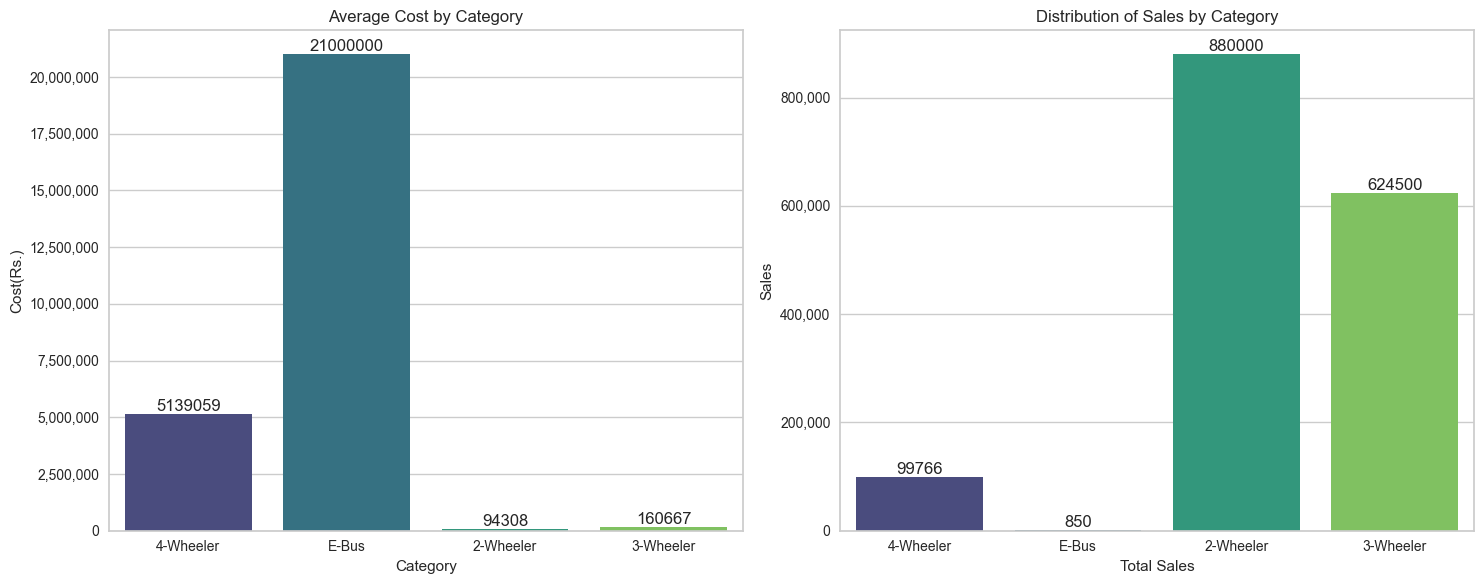

In [7]:
# Displaying the Average Cost and Sales by Category
def custom_formatter(x, pos):
    return f'{x:,.0f}'

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax1 = sns.barplot(ax = ax[0], data = vehicle, y = 'Cost(Rs.)', x = 'Category', hue = 'Category', palette = 'viridis', estimator = 'mean', errorbar = None)
for i in ax1.containers:
    ax1.bar_label(i, fmt = '%.0f')
    ax1.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax[0].set_title('Average Cost by Category')
plt.xlabel('Total Cost (Rs.)')

ax2 = sns.barplot(ax = ax[1], data = vehicle, y = 'Sales', x = 'Category', hue = 'Category', palette = 'viridis', estimator = 'sum', errorbar = None)
for i in ax2.containers:
    ax2.bar_label(i, fmt = '%.0f')
    ax2.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax[1].set_title('Distribution of Sales by Category')
plt.xlabel('Total Sales')

plt.tight_layout()
plt.show()

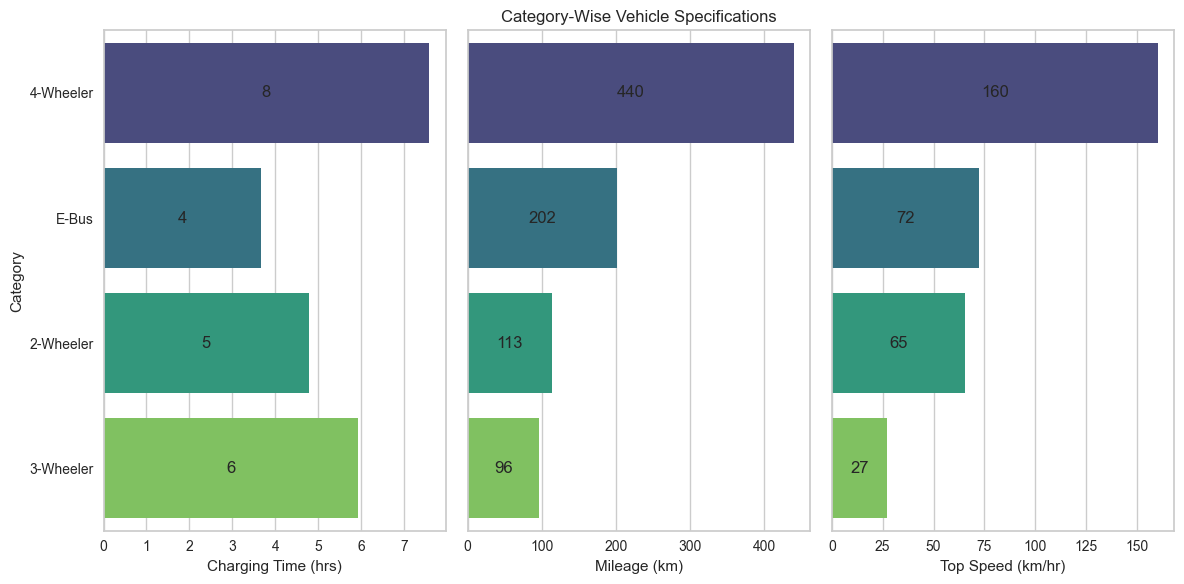

In [8]:
# Displaying the different features of an EV by Category
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
ax1 = sns.barplot(ax = ax[0], data = vehicle, x = 'ChargingTime(hrs)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax1.containers:
    ax1.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[0].set_xlabel('Charging Time (hrs)')

ax2 = sns.barplot(ax = ax[1], data = vehicle, x = 'Mileage(km)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax2.containers:
    ax2.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[1].set_xlabel('Mileage (km)')
ax[1].set_title('Category-Wise Vehicle Specifications')

ax3 = sns.barplot(ax = ax[2], data = vehicle, x = 'TopSpeed(km/h)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax3.containers:
    ax3.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[2].set_xlabel('Top Speed (km/hr)')

plt.ylabel('Category')
plt.tight_layout()
plt.show()

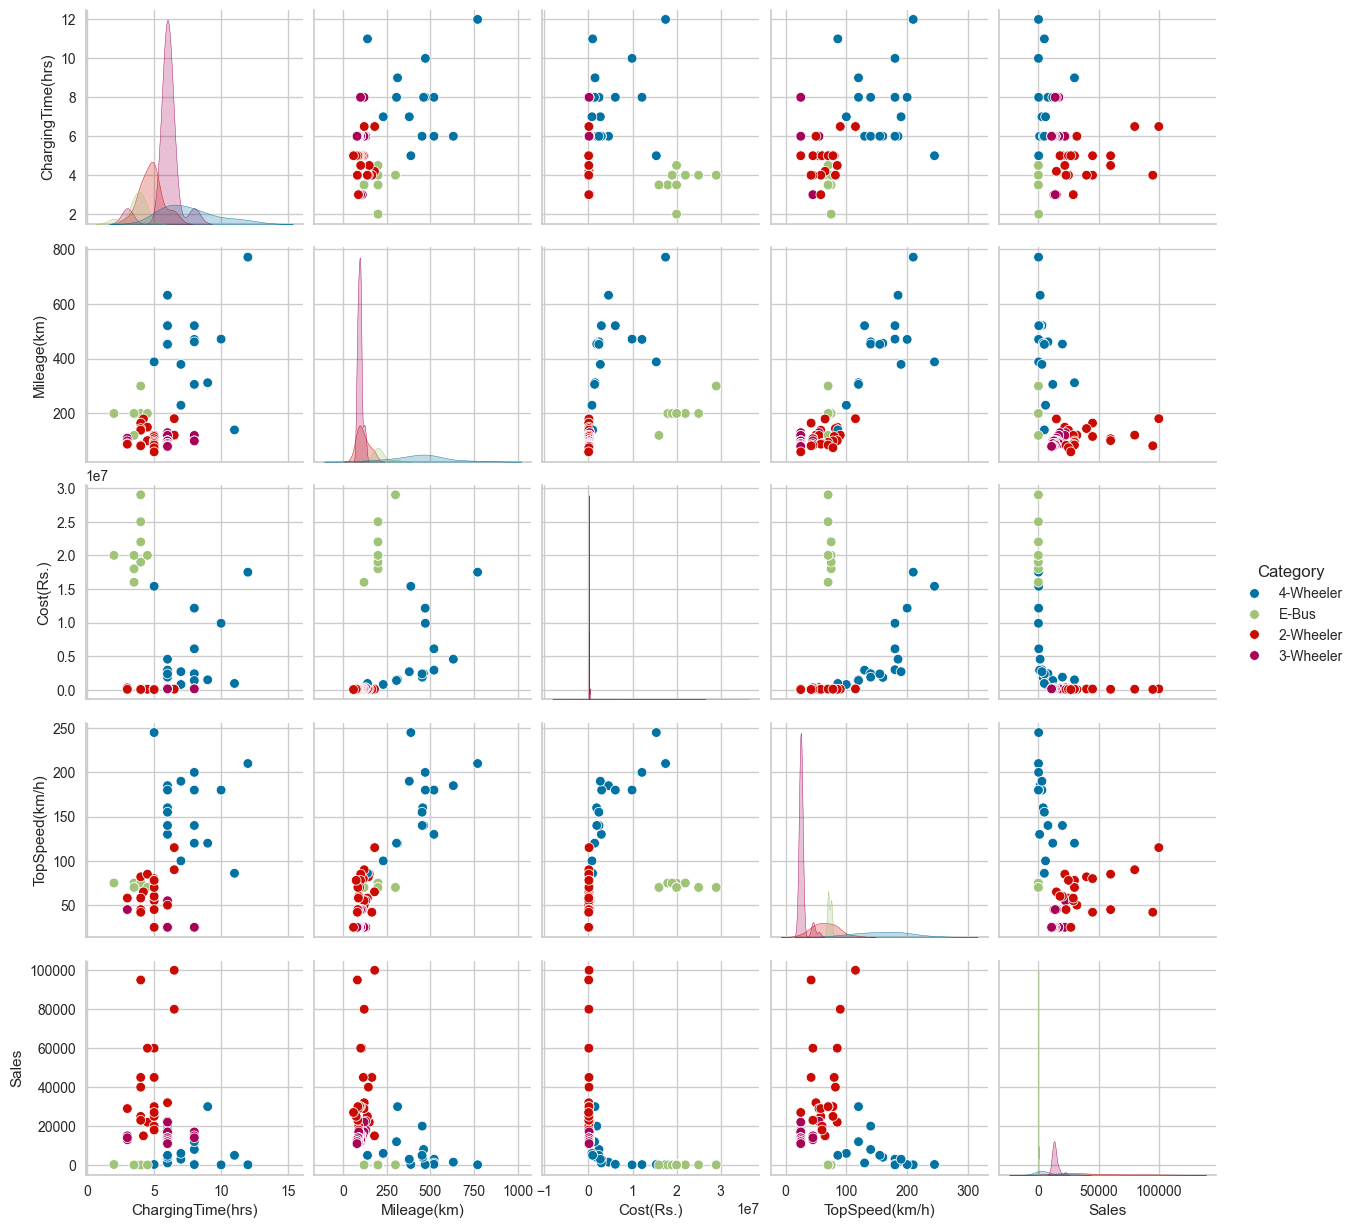

In [9]:
# Pairplot to show the relationships between the variables
sns.pairplot(vehicle, hue = 'Category')

<Axes: >

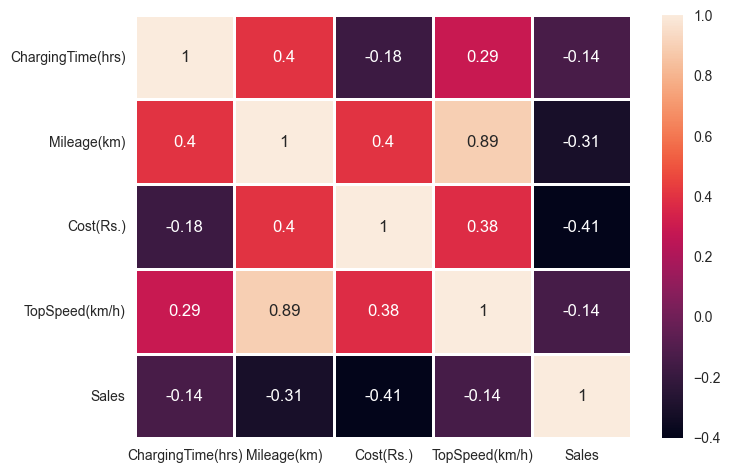

In [10]:
# Heatmap showing the correlations between each of the numerical variables
sns.heatmap(vehicle.iloc[:, 3:].corr(), linewidths = 1, annot = True)

## Principal Component Analysis

In [11]:
# Preprocessing the data using StandardScaler
vehiclescaled = StandardScaler().fit_transform(vehicle.iloc[:, 3:7].values)
vehiclescaleddf = pd.DataFrame(vehiclescaled, columns = ['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)'])
vehiclescaleddf.head()

,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h)
0,3.91,4.11,2.17,2.76
1,0.16,3.16,0.22,2.28
2,0.16,2.40,-0.01,2.19
3,0.16,2.39,-0.02,1.24
4,1.41,2.39,0.46,2.19


In [12]:
# Performing Principal Component Analysis(PCA) to find the impact of the variables
pca = PCA()
pcafit = pca.fit_transform(vehiclescaled)

pcexp = np.sqrt(pca.explained_variance_)
pcexpratio = pca.explained_variance_ratio_
pccum = pcexpratio.cumsum()
pcindex = [f"PC{i}" for i in range(1, len(pcexp) + 1)]
pcaresult = pd.DataFrame({'Standard Deviation': pcexp, 'Proportion of Variance': pcexpratio, 'Cumulative Proportion': pccum}, index = pcindex)
pcaresult

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.51,0.57,0.57
PC2,1.09,0.30,0.86
PC3,0.68,0.11,0.98
PC4,0.31,0.02,1.00


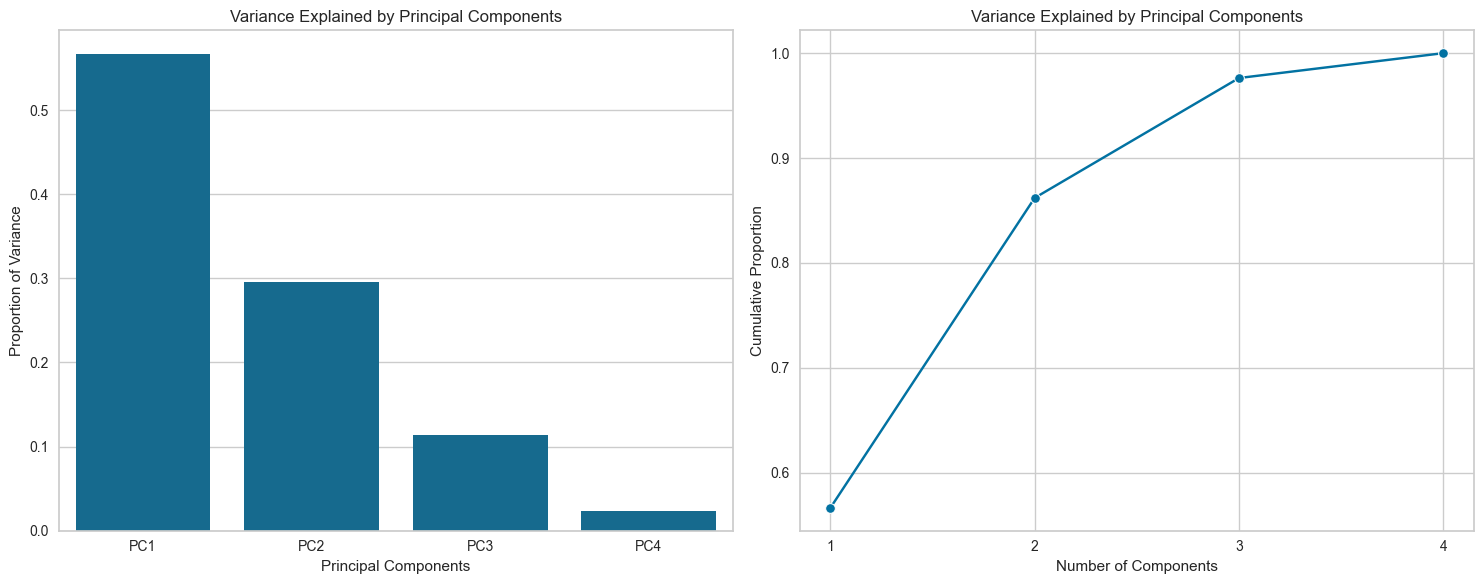

In [13]:
# Visualising the variance explained by the Principal Components
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.barplot(ax = ax[0], data = pcaresult, y = 'Proportion of Variance', x = pcaresult.index.values, errorbar = None)
ax[0].set_title('Variance Explained by Principal Components')
ax[0].set_xlabel('Principal Components')

sns.lineplot(ax = ax[1], data = pcaresult, y = 'Cumulative Proportion', x = range(1, 5), marker = 'o', errorbar = None)
ax[1].set_title('Variance Explained by Principal Components')
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xlabel('Number of Components')

plt.tight_layout()
plt.show()

In [14]:
# Displaying the values of each of the variables in each Principal Component
pcaf = pca.fit(vehiclescaleddf)
rotated = pcaf.components_.T

rotated_df = pd.DataFrame(rotated, index = vehiclescaleddf.columns.values, columns = pcindex)
rotated_df = round(-rotated_df, 3)
rotated_df

,PC1,PC2,PC3,PC4
ChargingTime(hrs),-0.29,0.74,-0.59,-0.13
Mileage(km),-0.64,0.04,0.20,0.74
Cost(Rs.),-0.35,-0.67,-0.65,-0.08
TopSpeed(km/h),-0.62,-0.02,0.43,-0.65


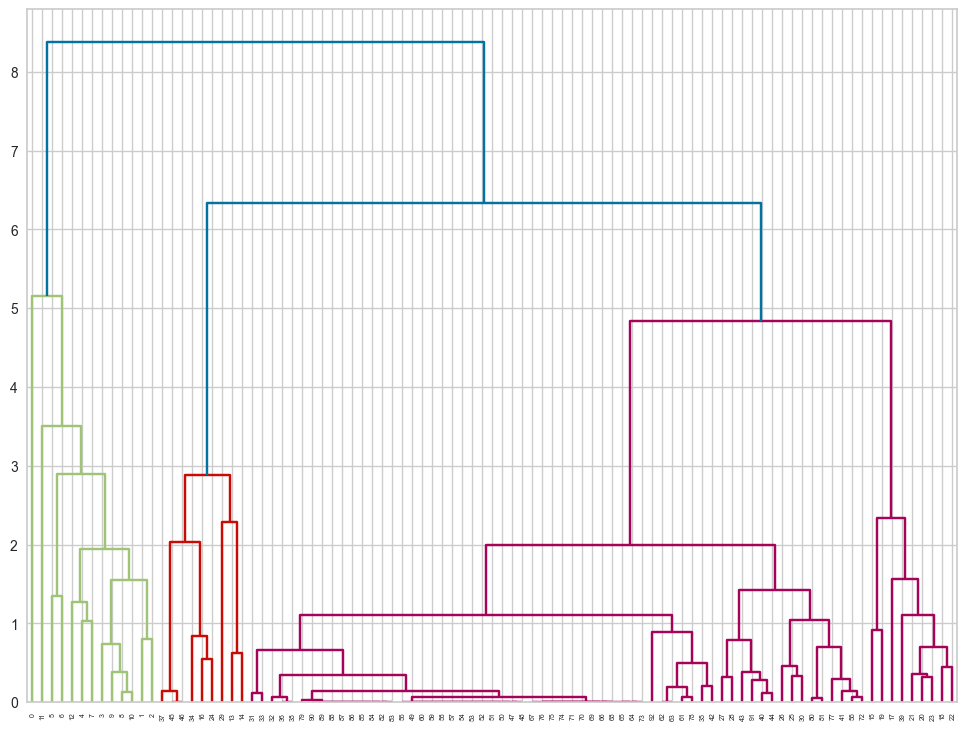

In [15]:
# Fitting a Dendrogram to the PCA data
pcafit2 = pd.DataFrame(pcafit, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

linked = linkage(pcafit2, 'complete')
plt.figure(figsize = (12, 9))
dendrogram(linked, orientation='top')
plt.show()

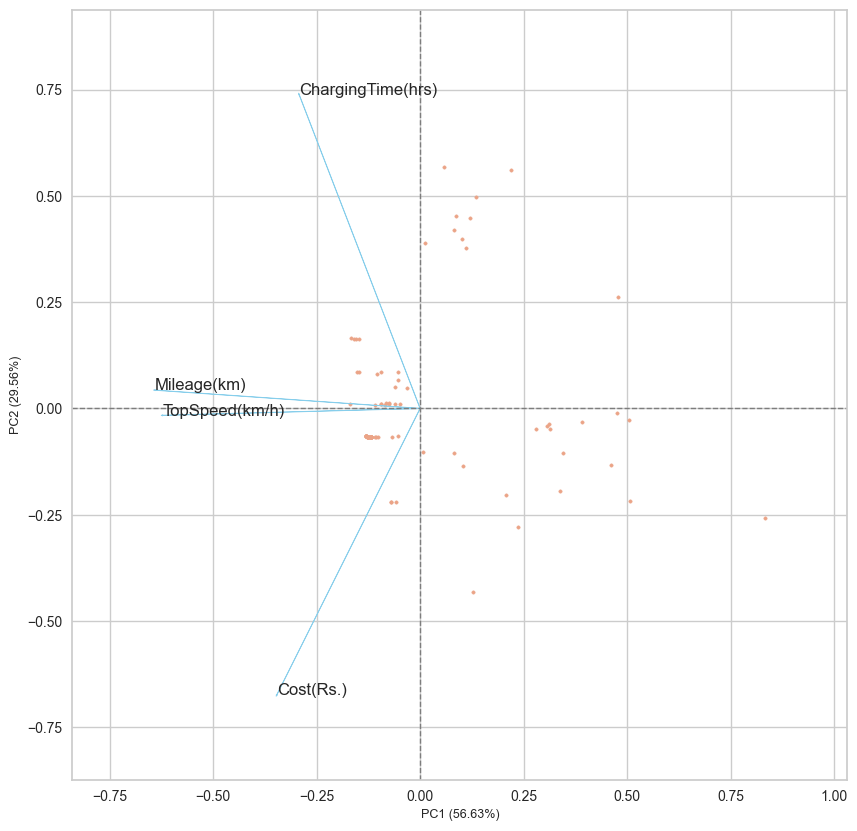

In [16]:
# Visualising the loadings of the variables in the first two Principal Components
loadings = (pca.components_)
cluster.biplot(cscore = pcafit, loadings = -loadings, labels = rotated_df.index.values, 
               var1 = round(pcexpratio[0]*100, 2),
               var2 = round(pcexpratio[1]*100, 2),
               show = True, dim = (10, 10))

## K-Means Clustering

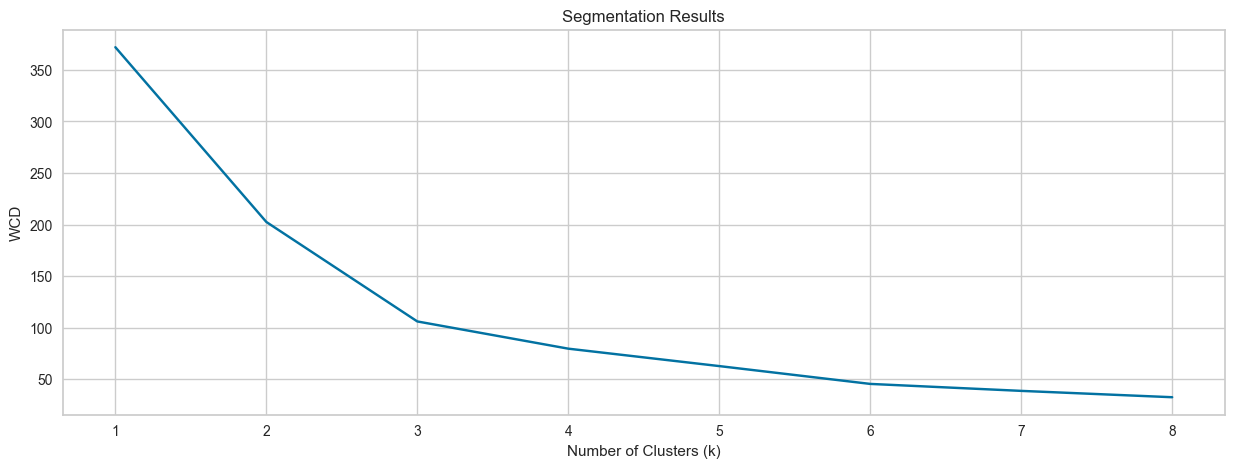

In [17]:
# Performing K-Means Clustering and plotting Within Cluster Distances
WCD = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(vehiclescaleddf)
    WCD.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 9), WCD)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCD")
plt.title("Segmentation Results")
plt.show()

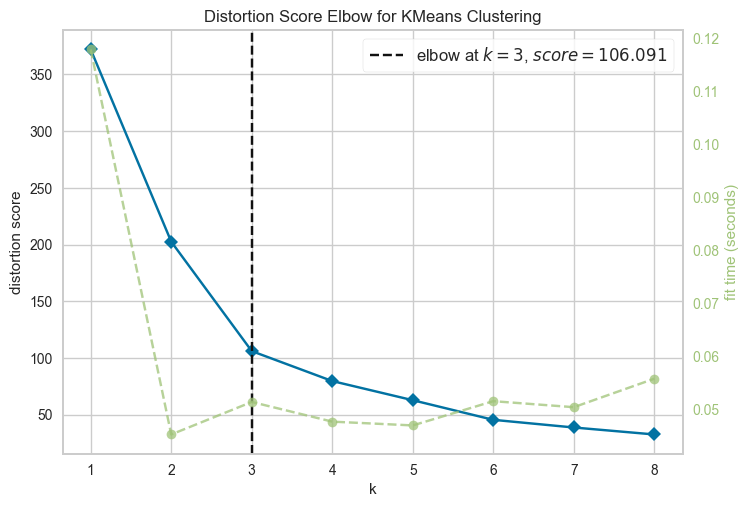

In [18]:
# Visualising the WCD using the KElbowVisualizer
model = KMeans(n_init = 10, random_state = 1234)
visualizer = KElbowVisualizer(model, k = (1,9), metric = 'distortion', timings = True)
visualizer.fit(vehiclescaleddf)
visualizer.show()
plt.show()

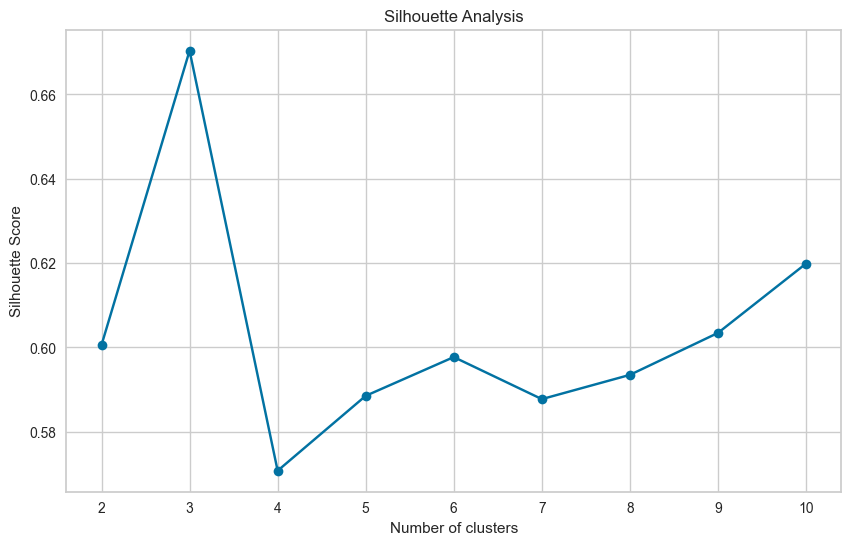

In [19]:
# Calculating Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 1234)
    kmeans.fit(vehiclescaleddf)
    score = silhouette_score(vehiclescaleddf, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
# Performing K-Means Clustering with the optimal number of clusters (3)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 1234)
vehicle['Cluster'] = kmeans.fit_predict(vehiclescaleddf)

# Finding the mean values of the variables in each cluster
cluster_profiles = vehicle.groupby('Cluster')[['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)', 'Sales']].mean()
cluster_profiles

,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
Cluster,,,,,
0,3.67,202.22,21000000.00,72.22,94.44
1,5.66,103.93,160199.75,41.14,21963.77
2,7.40,474.00,5707666.67,169.00,5917.73


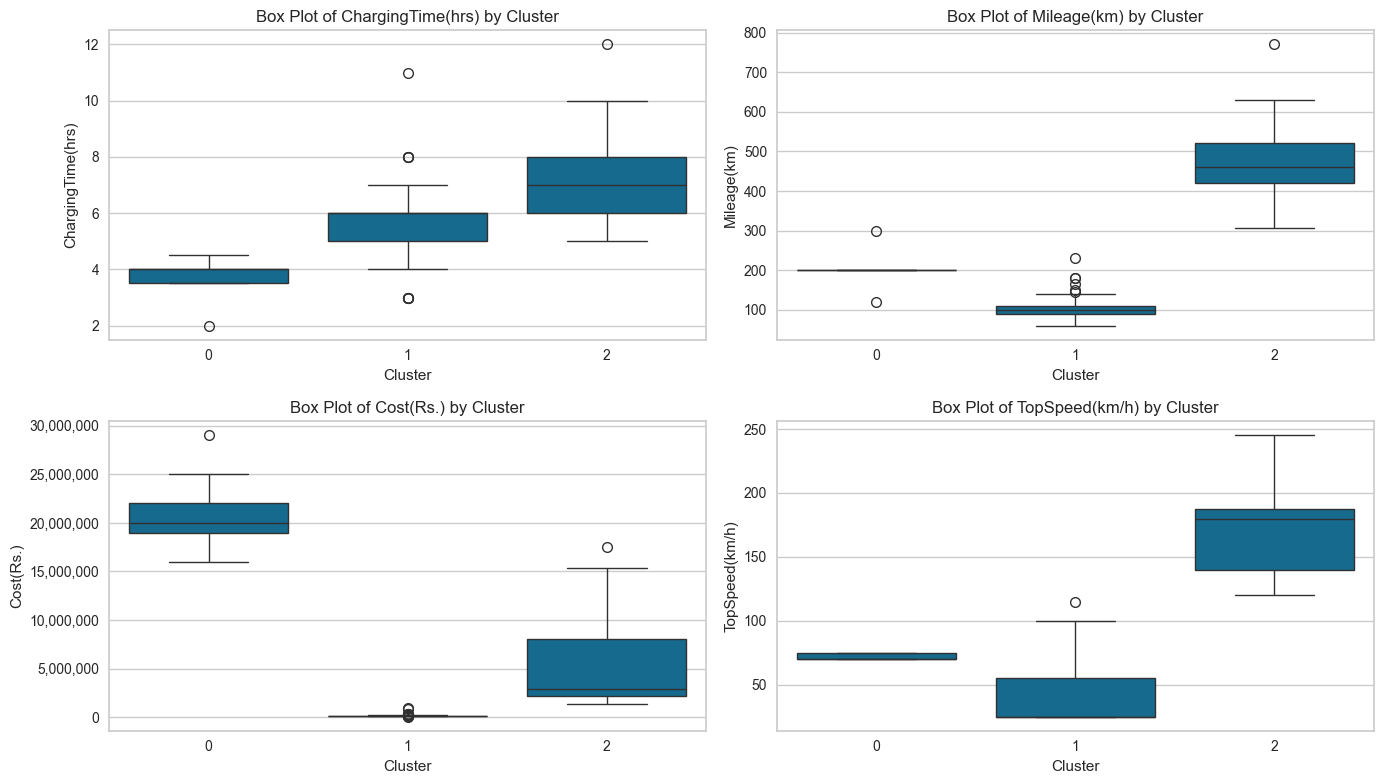

In [21]:
# Displaying a boxplot of the variables for each of the clusters
numeric_features = ['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=vehicle)
    plt.title(f'Box Plot of {feature} by Cluster')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

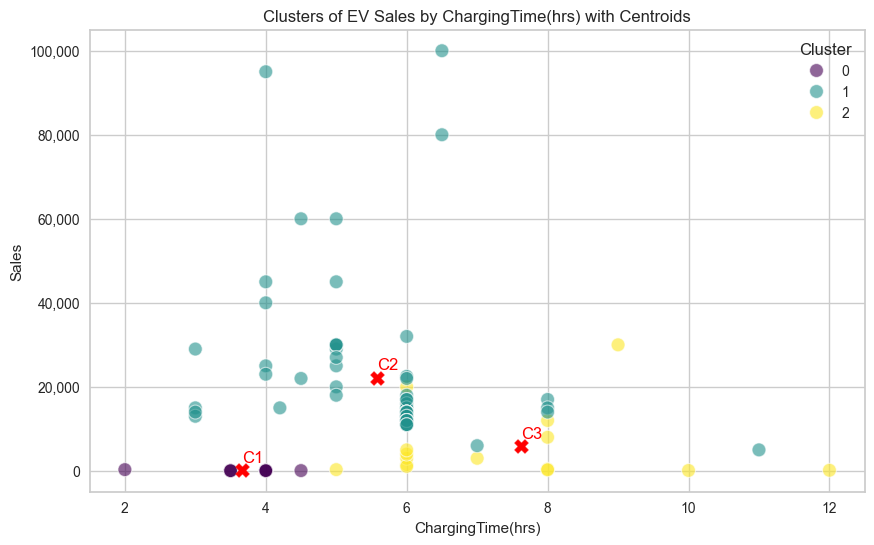

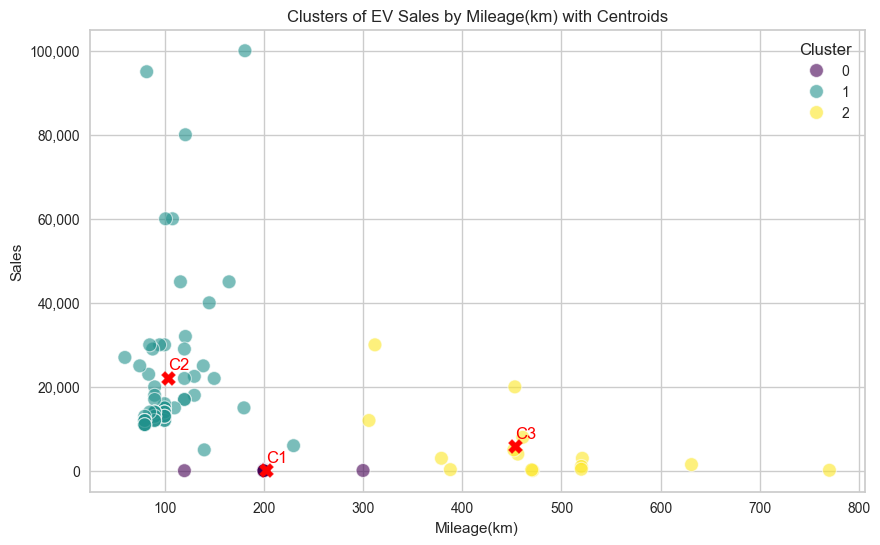

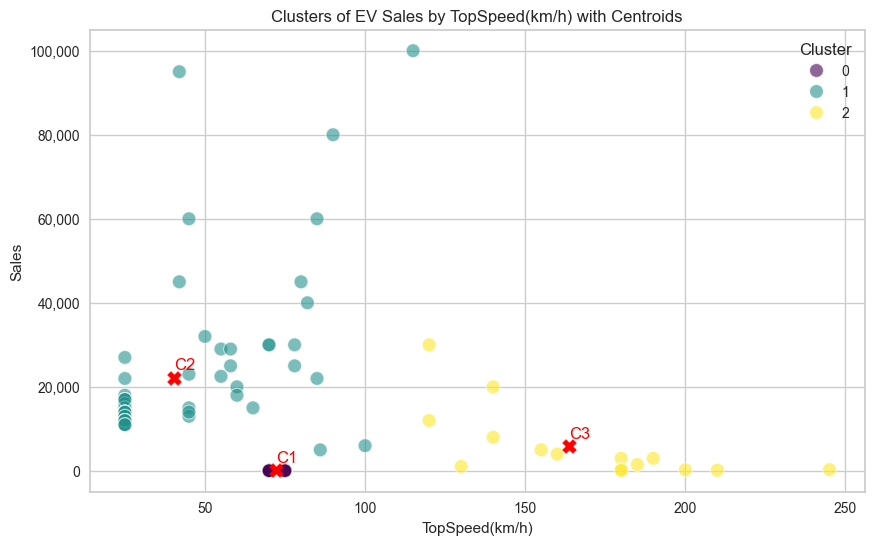

In [22]:
scaler = StandardScaler()
scaleddata = scaler.fit_transform(vehicle.iloc[:, 3:8].values)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 1234)
kmeans.fit_transform(scaleddata)

# Visualizing clusters with centroids
visualcols = ['ChargingTime(hrs)', 'Mileage(km)', 'TopSpeed(km/h)']
for i in range(len(visualcols)):
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(x=visualcols[i], y='Sales', hue='Cluster', palette='viridis', data=vehicle, s=100, alpha=0.6, edgecolor='w')
    ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids[:, [2, 3]] = centroids[:, [3, 2]]
    plt.scatter(centroids[:, i], centroids[:, 4], s=100, c='red', marker='X')
    for k, c in enumerate(centroids):
        plt.text(c[i], c[4] + 2000, f'C{k+1}', fontsize=12, color='red')
    plt.title(f'Clusters of EV Sales by {visualcols[i]} with Centroids')
    plt.xlabel(f'{visualcols[i]}')
    plt.ylabel('Sales')
    plt.legend(title='Cluster')
    plt.show()

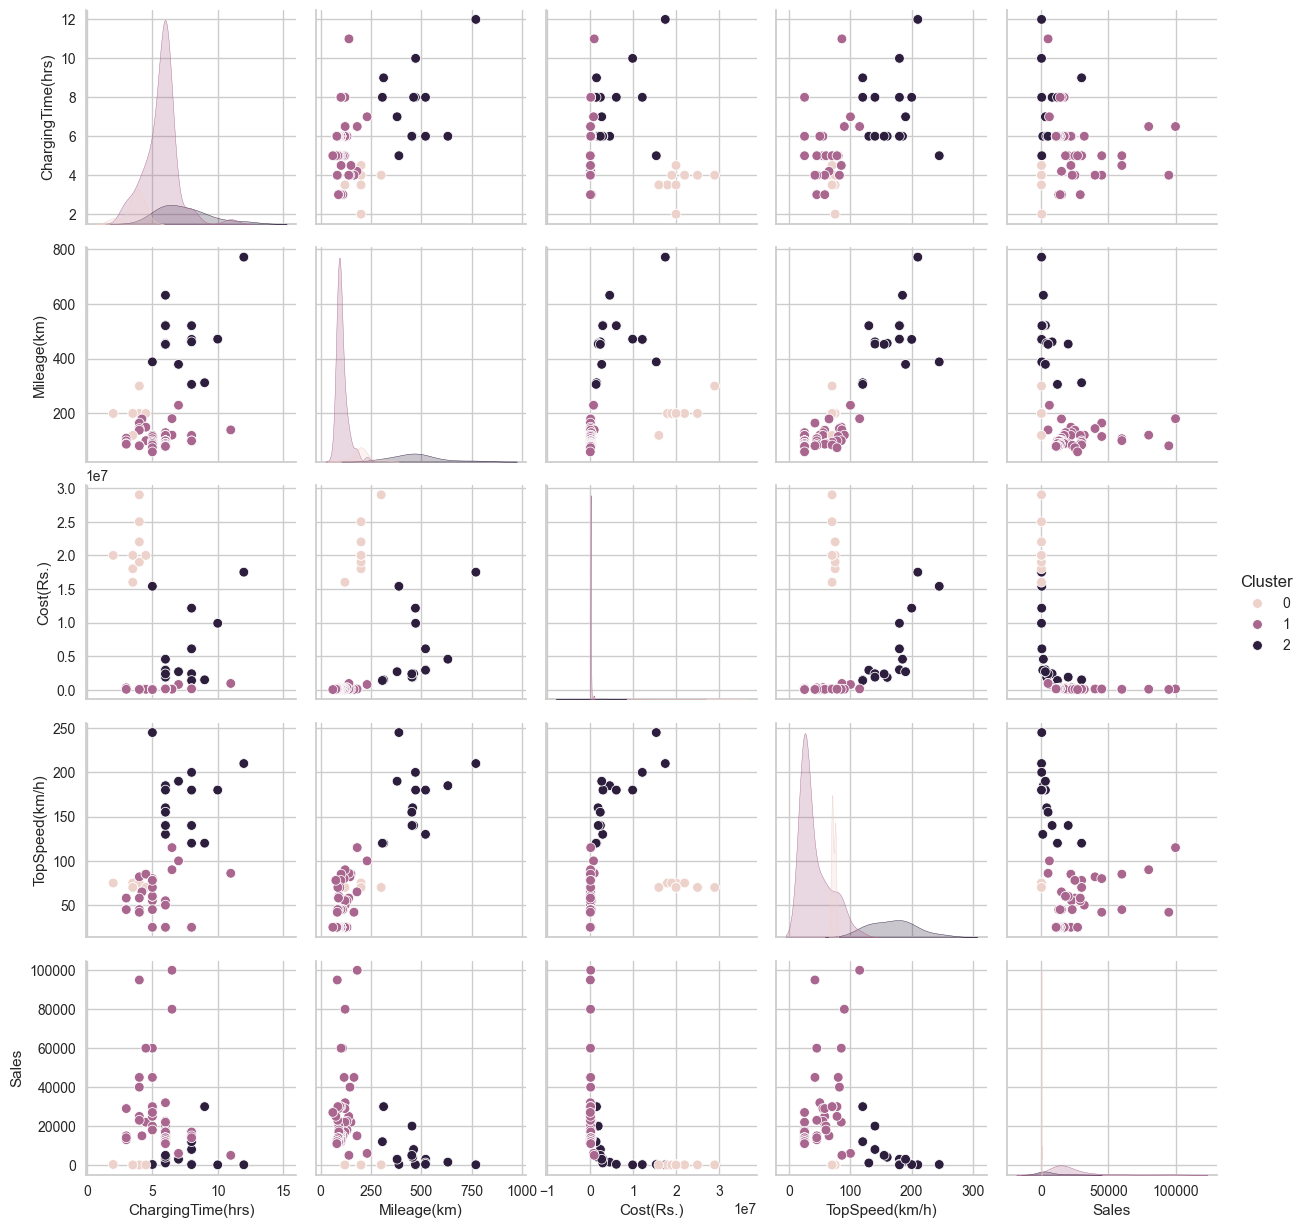

In [23]:
# Pairplot to show the relationships between the variables for the calculated clusters
sns.pairplot(vehicle, hue = 'Cluster')

## Customer Segmentation

In [24]:
# Importing the Customer Dataset
customer = pd.read_csv("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\Segmentation Analysis\\Car Purchase Behaviour.csv")
customer.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,2600000,1600000


## Exploratory Data Analysis

In [25]:
# Checking the formats and counts of the different columns
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marital Status    99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal Loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Total Salary      99 non-null     int64 
 8   Price             99 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 7.1+ KB


In [26]:
# Making sure that the columns are converted to the appropriate formats
customer.replace({'Yes': 1, 'No': 0}, inplace = True)
customer.replace({'Salaried': 1, 'Business': 0}, inplace = True)
customer.replace({'Single': 1, 'Married': 0}, inplace = True)
customer.replace({'Post Graduate': 1, 'Graduate': 0}, inplace = True)
customer = customer.astype({'Profession': 'float', 'Marital Status': 'float', 'Education': 'float', 'Personal Loan': 'float', 'House Loan': 'float'})
customer.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
0,27,1.00,1.00,1.00,0,1.00,0.00,800000,800000
1,35,1.00,0.00,1.00,2,1.00,1.00,2000000,1000000
2,45,0.00,0.00,0.00,4,1.00,1.00,1800000,1200000
3,41,0.00,0.00,1.00,3,0.00,0.00,2200000,1200000
4,31,1.00,0.00,1.00,2,1.00,0.00,2600000,1600000


In [27]:
# Checking for null values
customer.isnull().sum()

Age                 0
Profession          0
Marital Status      0
Education           0
No of Dependents    0
Personal Loan       0
House Loan          0
Total Salary        0
Price               0
dtype: int64

In [28]:
# Displaying the summary statistics for each of the numerical columns
customer.describe()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,36.31,0.65,0.15,0.57,2.18,0.32,0.37,2270707.07,1194040.40
std,6.25,0.48,0.36,0.50,1.34,0.47,0.49,1050777.41,437695.54
min,26.00,0.00,0.00,0.00,0.00,0.00,0.00,200000.00,110000.00
25%,31.00,0.00,0.00,0.00,2.00,0.00,0.00,1550000.00,800000.00
50%,36.00,1.00,0.00,1.00,2.00,0.00,0.00,2100000.00,1200000.00
75%,41.00,1.00,0.00,1.00,3.00,1.00,1.00,2700000.00,1500000.00
max,51.00,1.00,1.00,1.00,4.00,1.00,1.00,5200000.00,3000000.00


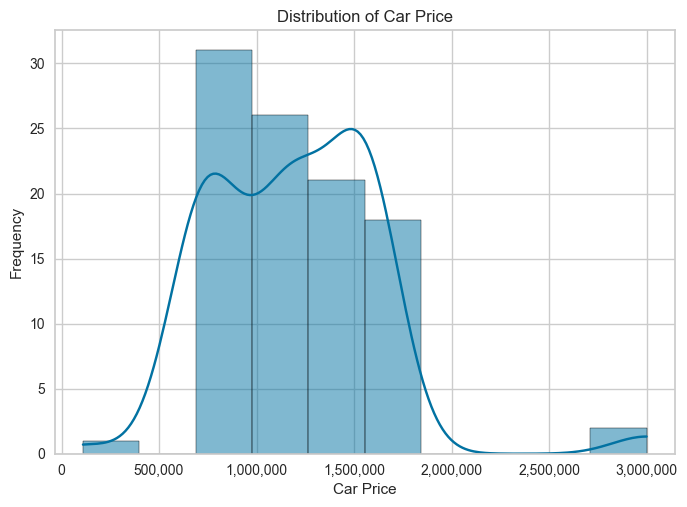

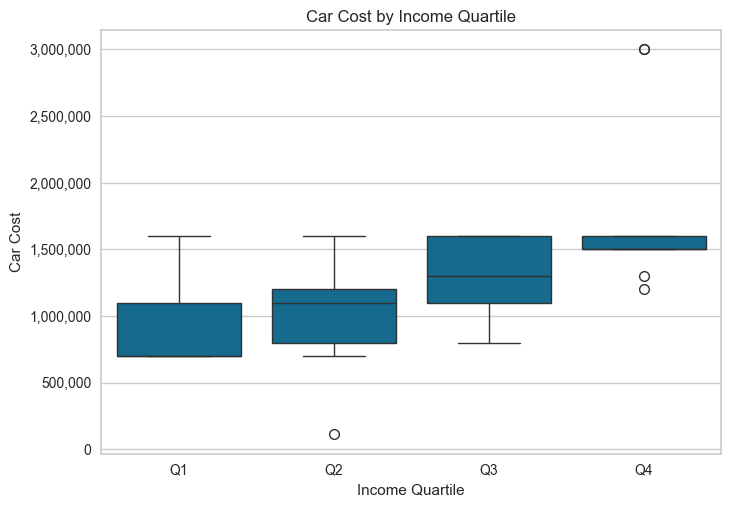

In [29]:
# Plotting the distribution of the car prices
ax = sns.histplot(customer['Price'], kde=True)
ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.title('Distribution of Car Price')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

# Visualising the cost of the car based on the different income quartiles using boxplots
customer['Income Quartile'] = pd.qcut(customer['Total Salary'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
ax = sns.boxplot(x='Income Quartile', y='Price', data=customer)
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.title('Car Cost by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('Car Cost')
plt.show()

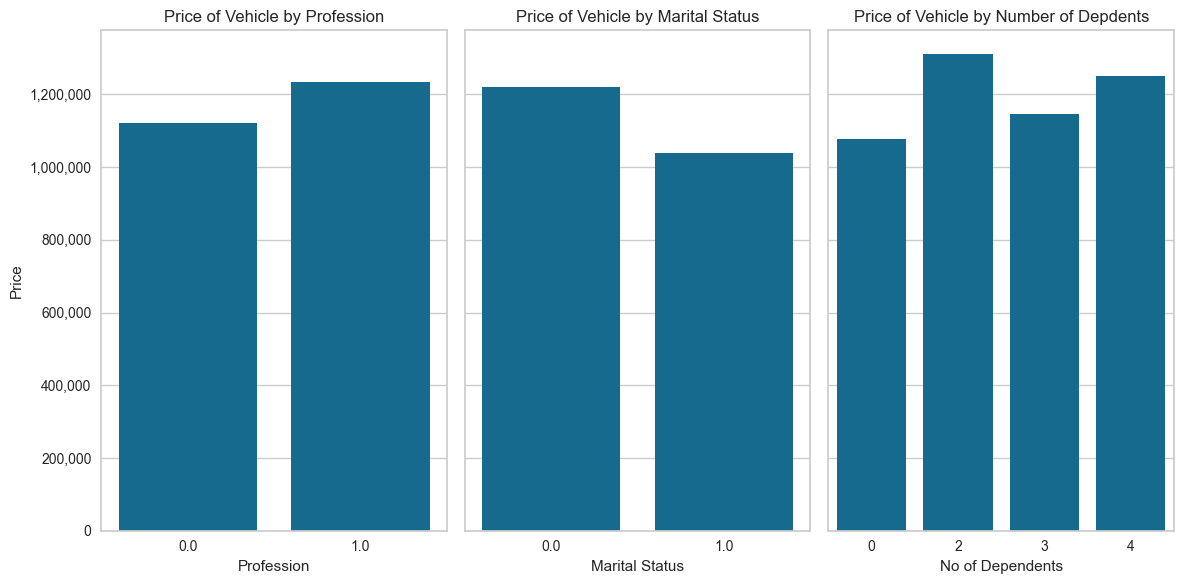

In [30]:
# Examining visually the impact of different factors on the price of a customer's vehicle
customer.drop('Income Quartile', axis = 1, inplace = True)
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)

ax1 = sns.barplot(ax = ax[0], data = customer, x = 'Profession', y = 'Price', errorbar = None)
ax[0].set_xlabel('Profession')
ax[0].set_title('Price of Vehicle by Profession')
ax1.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

ax2 = sns.barplot(ax = ax[1], data = customer, x = 'Marital Status', y = 'Price', errorbar = None)
ax[1].set_xlabel('Marital Status')
ax[1].set_title('Price of Vehicle by Marital Status')
ax2.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

ax3 = sns.barplot(ax = ax[2], data = customer, x = 'No of Dependents', y = 'Price', errorbar = None)
ax[2].set_xlabel('No of Dependents')
ax[2].set_title('Price of Vehicle by Number of Depdents')
ax3.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

<Axes: >

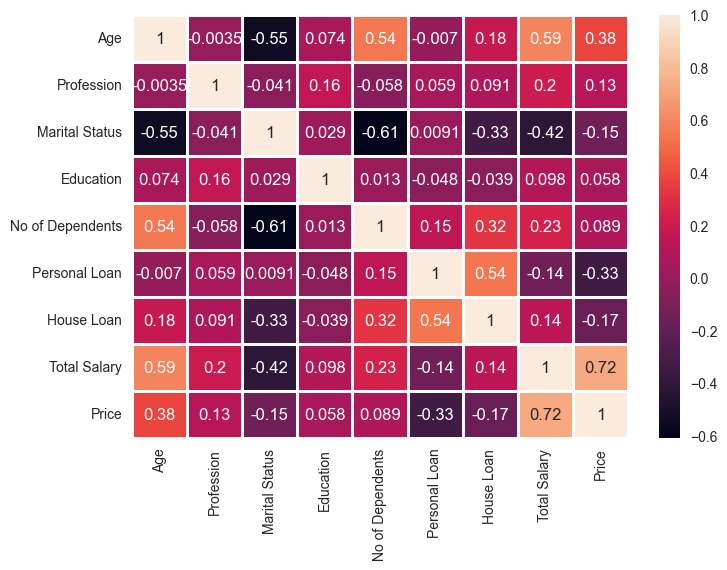

In [31]:
# Heatmap showing the correlations between each of the numerical variables
customerfeatures = customer.iloc[:, :8]
sns.heatmap(customer.corr(), linewidths = 1, annot = True)

## Principal Component Analysis (PCA)

In [32]:
# Preprocessing the data using StandardScaler
customerscaled = pd.DataFrame(StandardScaler().fit_transform(customerfeatures), columns = customerfeatures.columns.values)

# Performing Principal Component Analysis(PCA) to find the impact of the variables
pca = PCA()
pcafit = pca.fit_transform(customerscaled)

pcexp = np.sqrt(pca.explained_variance_)
pcexpratio = pca.explained_variance_ratio_
pccum = pcexpratio.cumsum()
pcindex = [f"PC{i}" for i in range(1, len(pcexp) + 1)]
pcaresult = pd.DataFrame({'Standard Deviation': pcexp, 'Proportion of Variance': pcexpratio, 'Cumulative Proportion': pccum}, index = pcindex)
pcaresult

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.64,0.33,0.33
PC2,1.24,0.19,0.52
PC3,1.11,0.15,0.68
PC4,0.94,0.11,0.79
PC5,0.81,0.08,0.87
PC6,0.70,0.06,0.93
PC7,0.56,0.04,0.96
PC8,0.53,0.04,1.00


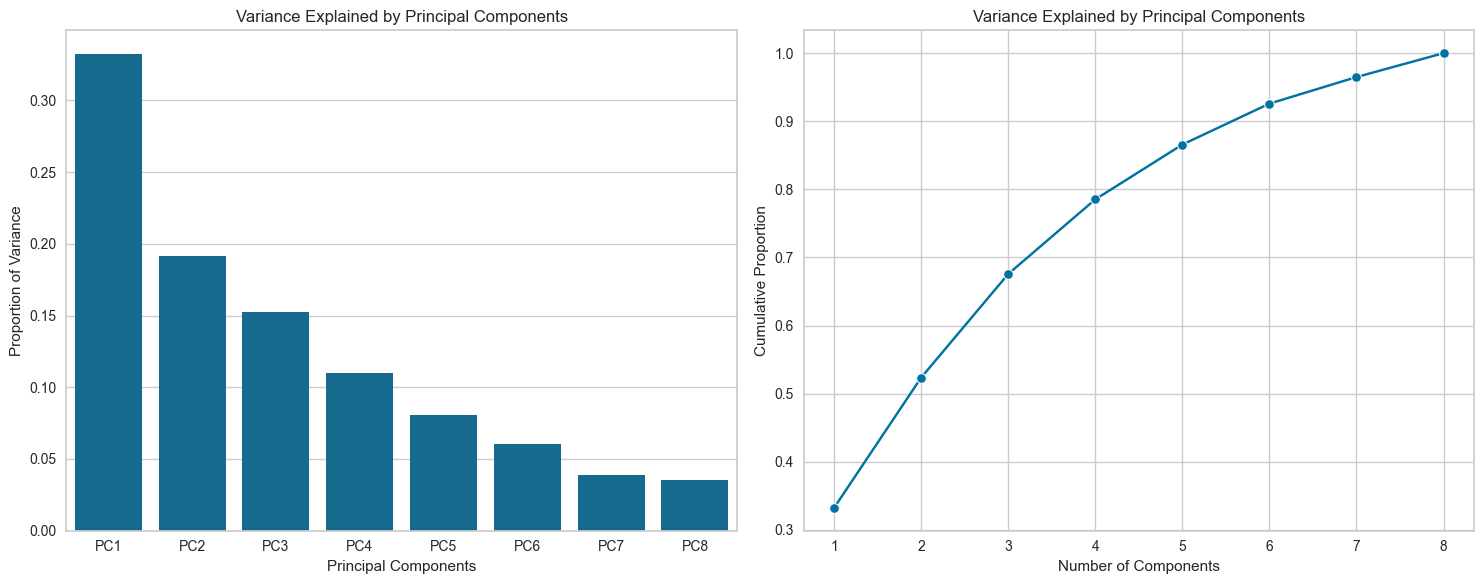

In [33]:
# Visualising the variance explained by the Principal Components
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.barplot(ax = ax[0], data = pcaresult, y = 'Proportion of Variance', x = pcaresult.index.values, errorbar = None)
ax[0].set_title('Variance Explained by Principal Components')
ax[0].set_xlabel('Principal Components')

sns.lineplot(ax = ax[1], data = pcaresult, y = 'Cumulative Proportion', x = range(1, len(pcaresult.index.values) + 1), marker = 'o', errorbar = None)
ax[1].set_title('Variance Explained by Principal Components')
ax[1].set_xticks(range(1, len(pcaresult.index.values) + 1))
ax[1].set_xlabel('Number of Components')

plt.tight_layout()
plt.show()

In [34]:
# Displaying the values of each of the variables in each Principal Component
pcaf = pca.fit(customerscaled)
rotated = pcaf.components_.T

rotated_df = pd.DataFrame(rotated, index = customerscaled.columns.values, columns = pcindex)
rotated_df = round(-rotated_df, 3)
rotated_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Age,0.50,0.21,-0.07,0.05,-0.27,0.43,-0.05,-0.66
Profession,0.07,0.03,0.73,-0.47,0.43,0.19,-0.07,-0.11
Marital Status,-0.50,-0.07,0.14,0.05,-0.37,0.39,-0.66,0.04
Education,0.04,0.20,0.55,0.79,-0.03,-0.14,0.07,0.01
No of Dependents,0.47,-0.08,-0.21,0.24,0.46,0.29,-0.44,0.41
Personal Loan,0.11,-0.69,0.16,0.09,-0.23,0.44,0.43,0.19
House Loan,0.32,-0.55,0.14,-0.04,-0.17,-0.56,-0.42,-0.23
Total Salary,0.40,0.34,0.20,-0.28,-0.56,-0.08,-0.02,0.54


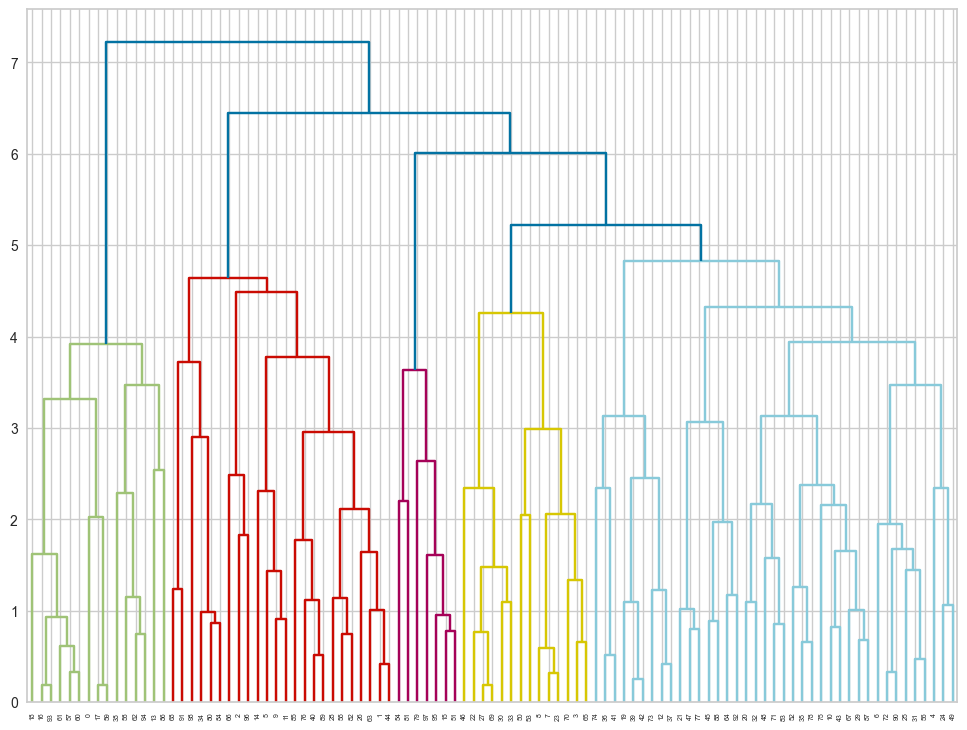

In [35]:
# Fitting a Dendrogram to the PCA data
pcafit2 = pd.DataFrame(pcafit, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

linked = linkage(pcafit2, 'complete')
plt.figure(figsize = (12, 9))
dendrogram(linked, orientation='top')
plt.show()

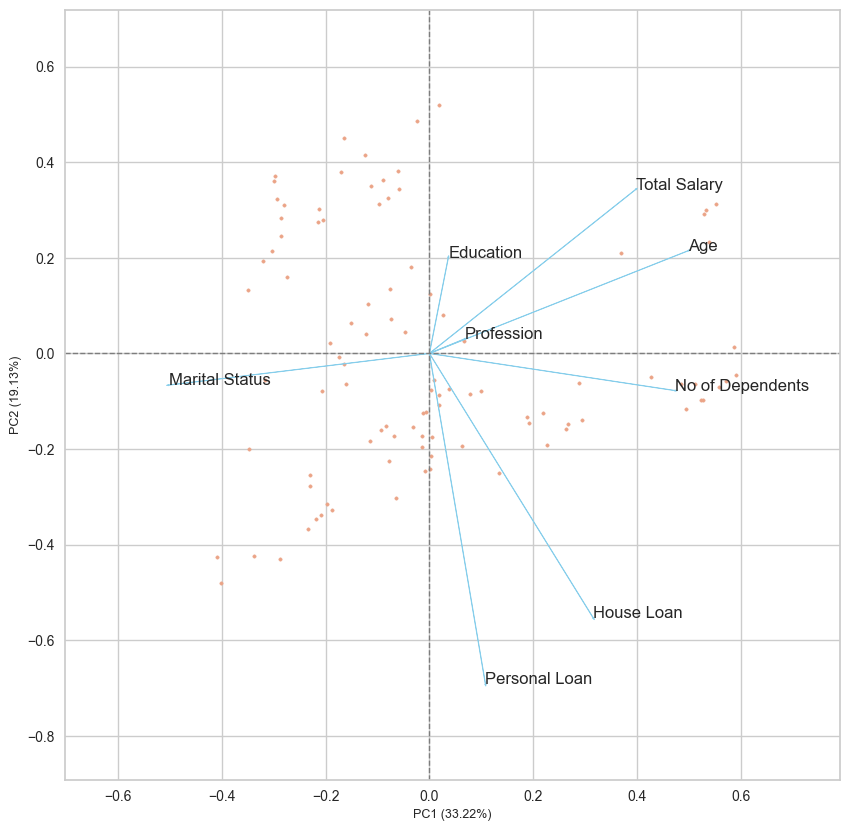

In [36]:
# Visualising the loadings of the variables in the first two Principal Components
loadings = (pca.components_)
cluster.biplot(cscore = pcafit, loadings = -loadings, labels = customerscaled.columns.values, 
               var1 = round(pcexpratio[0]*100, 2),
               var2 = round(pcexpratio[1]*100, 2),
               show = True, dim = (10, 10))


## K-Means Clustering

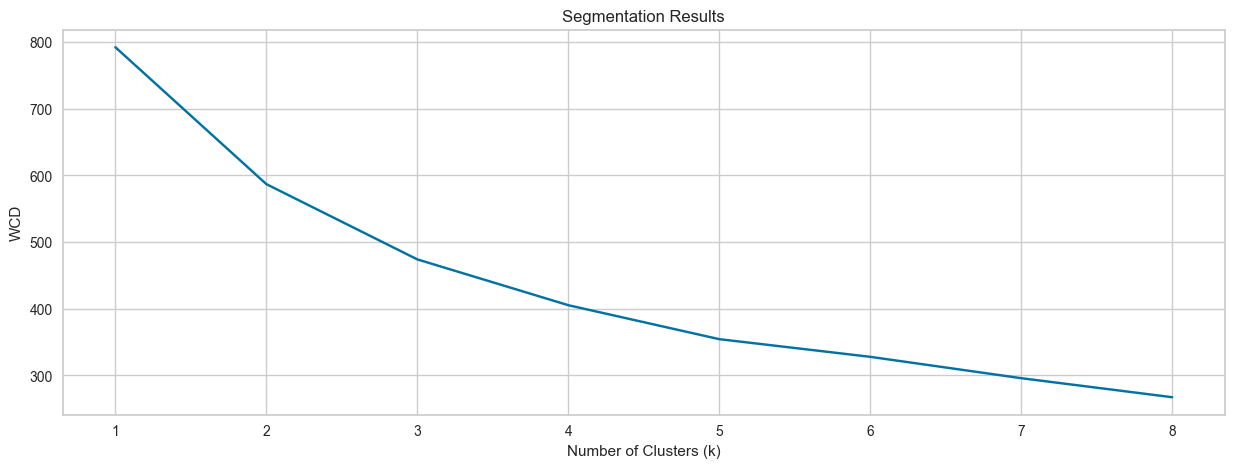

In [37]:
# Performing K-Means Clustering and plotting Within Cluster Distances
WCD = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(customerscaled)
    WCD.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 9), WCD)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCD")
plt.title("Segmentation Results")
plt.show()

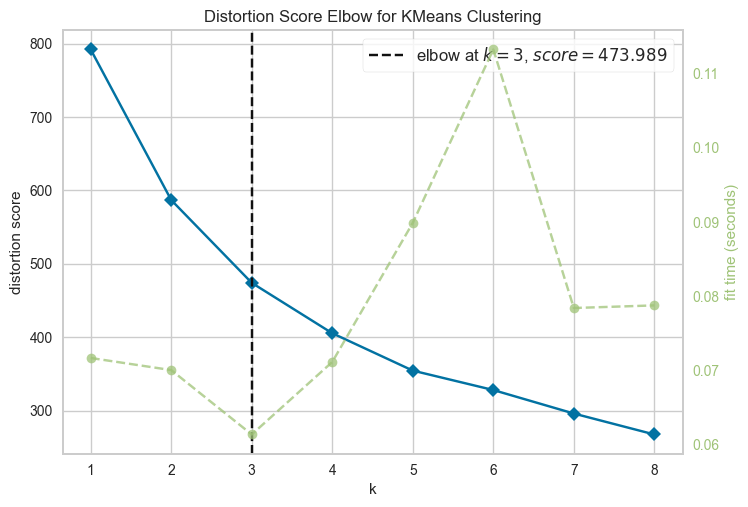

In [38]:
# Visualising the WCD using the KElbowVisualizer
model = KMeans(n_init = 10, random_state = 1234)
visualizer = KElbowVisualizer(model, k = (1,9), metric = 'distortion', timings = True)
visualizer.fit(customerscaled)
visualizer.show()
plt.show()

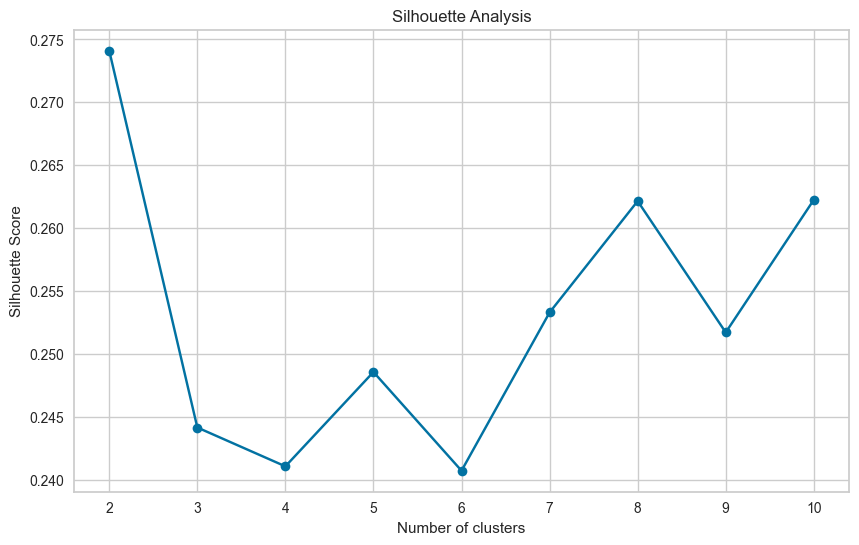

In [39]:
# Calculating Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(customerscaled)
    score = silhouette_score(customerscaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [40]:
# Performing K-Means Clustering with the optimal number of clusters (5)
kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 1234)
customer['Cluster'] = kmeans.fit_predict(customerscaled)

# Finding the mean values of the variables in each cluster
cluster_profiles = customer.groupby('Cluster').mean()
cluster_profiles

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
Cluster,,,,,,,,,
0,34.32,1.00,0.00,0.40,1.92,0.12,0.20,2292000.00,1220400.00
1,36.89,0.00,0.00,0.47,2.68,0.00,0.16,1836842.11,1121052.63
2,28.20,0.60,1.00,0.60,0.27,0.33,0.00,1240000.00,1040000.00
3,43.50,0.88,0.00,0.88,2.75,0.00,0.31,3800000.00,1700000.00
4,38.21,0.67,0.00,0.58,2.88,1.00,1.00,2216666.67,983333.33


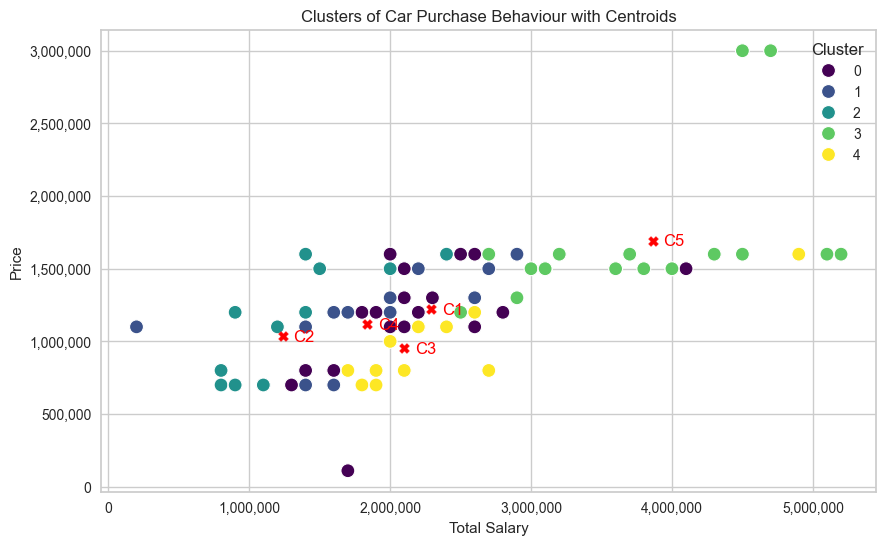

In [41]:
scaler = StandardScaler()
scaleddata = scaler.fit_transform(customer.values)
kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 1234)
kmeans.fit_transform(scaleddata)

# Visualizing clusters with centroids
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Total Salary', y='Price', hue='Cluster', data=customer, palette = 'viridis', s=100)
ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 7], centroids[:, 8], s=50, c='red', marker='X')
for i, c in enumerate(centroids):
    plt.text(c[7] + 75000, c[8] - 37000, f'C{i+1}', fontsize=12, color='red')
plt.title('Clusters of Car Purchase Behaviour with Centroids')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()